# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

# 1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, diner e net_bill.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from patsy import dmatrices

# Carregar o conjunto de dados e criar variáveis adicionais
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Criar a matriz de design e matriz y usando Patsy
y, X = dmatrices('tip ~ sex + smoker + day + net_bill', data=tips, return_type='dataframe')

# Exibir as primeiras linhas de y (matriz y)
print("Matriz y:")
print(y.head())

# Exibir as primeiras linhas de X (matriz de design)
print("\nMatriz de design X:")
print(X.head())


Matriz y:
    tip
0  1.01
1  1.66
2  3.50
3  3.31
4  3.61

Matriz de design X:
   Intercept  sex[T.Female]  smoker[T.No]  day[T.Fri]  day[T.Sat]  day[T.Sun]  \
0        1.0            1.0           1.0         0.0         0.0         1.0   
1        1.0            0.0           1.0         0.0         0.0         1.0   
2        1.0            0.0           1.0         0.0         0.0         1.0   
3        1.0            0.0           1.0         0.0         0.0         1.0   
4        1.0            1.0           1.0         0.0         0.0         1.0   

   net_bill  
0     15.98  
1      8.68  
2     17.51  
3     20.37  
4     20.98  


# 2. Remova as variáveis não significantes.

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from patsy import dmatrices

# Carregar o conjunto de dados e criar variáveis adicionais
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Criar a matriz de design e matriz y usando Patsy
y, X = dmatrices('tip ~ sex + smoker + day + net_bill', data=tips, return_type='dataframe')

# Ajustar o modelo linear usando ols
model = smf.ols('tip ~ sex + smoker + day + net_bill', data=tips).fit()

# Exibir resumo estatístico para avaliação da significância das variáveis
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     20.14
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           5.30e-19
Time:                        21:45:31   Log-Likelihood:                -374.68
No. Observations:                 244   AIC:                             763.4
Df Residuals:                     237   BIC:                             787.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2017      0.258      4.652

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from patsy import dmatrices

# Carregar o conjunto de dados e criar variáveis adicionais
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Ajustar o modelo linear usando ols removendo variáveis não significativas
model_adjusted = smf.ols('tip ~ net_bill', data=tips).fit()

# Exibir resumo estatístico para avaliação da significância das variáveis
print(model_adjusted.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           5.02e-23
Time:                        21:46:47   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

# 3. observe o gráfico de resíduos em função de net_bill

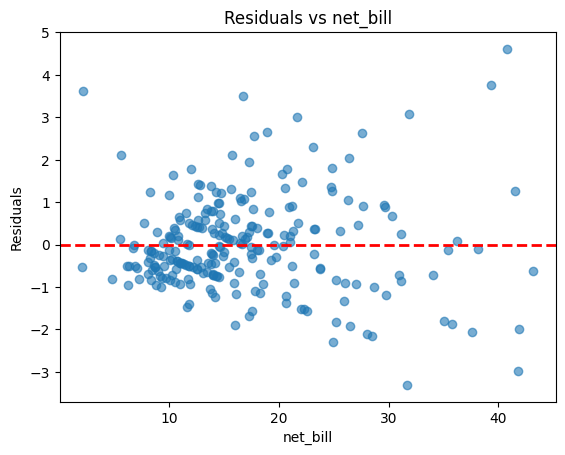

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

# Carregar o conjunto de dados e criar variáveis adicionais
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Ajustar o modelo linear usando ols com a variável significativa net_bill
model = smf.ols('tip ~ net_bill', data=tips).fit()

# Calcular os resíduos
residuals = model.resid

# Plotar o gráfico de resíduos em função de net_bill
plt.scatter(tips['net_bill'], residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Linha horizontal em y=0
plt.xlabel('net_bill')
plt.ylabel('Residuals')
plt.title('Residuals vs net_bill')

plt.show()


# 4.teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from patsy import dmatrices

# Carregar o conjunto de dados e criar variáveis adicionais
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Passo I: Transformação logarítmica de net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])

# Criar a matriz de design e matriz y usando Patsy
y, X_log = dmatrices('tip ~ log_net_bill', data=tips, return_type='dataframe')

# Ajustar o modelo linear usando ols com log(net_bill)
model_log = smf.ols('tip ~ log_net_bill', data=tips).fit()

# Exibir resumo estatístico
print("Modelo com Logaritmo:")
print(model_log.summary())

# Passo II: Transformação polinomial de net_bill
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Criar a matriz de design e matriz y usando Patsy
y, X_poly = dmatrices('tip ~ net_bill_squared', data=tips, return_type='dataframe')

# Ajustar o modelo linear usando ols com net_bill ao quadrado
model_poly = smf.ols('tip ~ net_bill_squared', data=tips).fit()

# Exibir resumo estatístico
print("\nModelo com Polinômio:")
print(model_poly.summary())


Modelo com Logaritmo:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           4.40e-20
Time:                        21:50:58   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.2575   

## Modelo com Logaritmo:

* R-squared: 0.294
* Coeficiente para log_net_bill: 1.5695 (p-value < 0.001)

## Modelo com Polinômio:

* R-squared: 0.301
* Coeficiente para net_bill_squared: 0.0021 (p-value < 0.001)

Ao comparar o R-squared, observamos um ligeiro aumento no modelo com polinômio (0.301 em comparação com 0.294), indicando que uma maior proporção da variação em tip é explicada pelo modelo polinomial. Além disso, o coeficiente associado a net_bill_squared no modelo polinomial é estatisticamente significativo (p-value < 0.001), sugerindo que a adição do termo polinomial é estatisticamente relevante.

**Resposta: Portanto, com base nessas métricas, o modelo com polinômio parece oferecer um ajuste ligeiramente melhor aos dados, e a adição do termo polinomial é estatisticamente justificada.**









### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     18.75
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           7.85e-18
Time:                        22:05:13   Log-Likelihood:                -95.867
No. Observations:                 244   AIC:                             205.7
Df Residuals:                     237   BIC:                             230.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4554      0.082      5.527

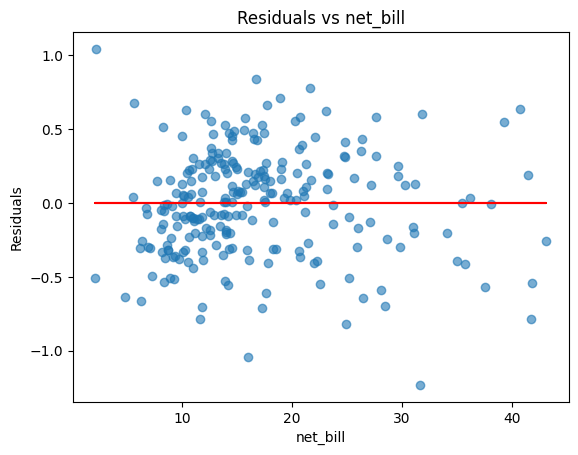

Modelo com Logaritmo:
                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     19.45
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           2.01e-18
Time:                        22:05:14   Log-Likelihood:                -94.413
No. Observations:                 244   AIC:                             202.8
Df Residuals:                     237   BIC:                             227.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         

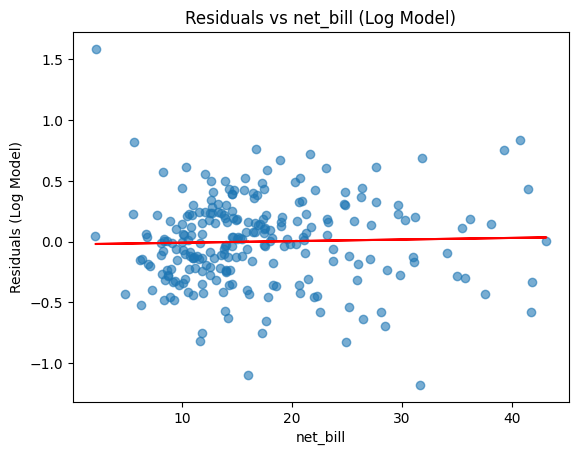


Modelo com Polinômio:
                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     17.92
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           4.96e-19
Time:                        22:05:14   Log-Likelihood:                -91.253
No. Observations:                 244   AIC:                             198.5
Df Residuals:                     236   BIC:                             226.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        

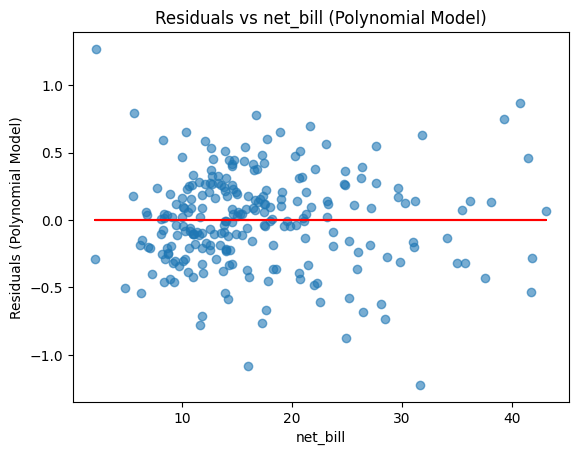

R^2 na escala de tip (sem o log): 0.2985636130459417


In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from patsy import dmatrices
import matplotlib.pyplot as plt

# Carregar o conjunto de dados
tips = sns.load_dataset("tips")

# Criar a variável net_bill
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Criar a variável resposta no logaritmo de tip
tips['log_tip'] = np.log(tips['tip'])

# Criar a matriz de design e a matriz de resposta usando Patsy
y, X = dmatrices('log_tip ~ sex + smoker + day + net_bill', data=tips, return_type='dataframe')

# Ajustar o modelo linear usando ols
model = smf.ols('log_tip ~ sex + smoker + day + net_bill', data=tips).fit()

# Exibir resumo estatístico para avaliação da significância das variáveis
print(model.summary())

# Plotar o gráfico de resíduos em função de net_bill
residuals = model.resid
plt.scatter(tips['net_bill'], residuals, alpha=0.6)
plt.xlabel('net_bill')
plt.ylabel('Residuals')
plt.title('Residuals vs net_bill')

# Adicionar a linha de regressão
fit = np.polyfit(tips['net_bill'], residuals, 1)
fit_fn = np.poly1d(fit)
plt.plot(tips['net_bill'], fit_fn(tips['net_bill']), color='red')

plt.show()

# Adicionar variável de net_bill ao quadrado
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustar modelos com diferentes transformações de net_bill
model_log = smf.ols('log_tip ~ sex + smoker + day + np.log(net_bill)', data=tips).fit()
model_poly = smf.ols('log_tip ~ sex + smoker + day + net_bill + net_bill_squared', data=tips).fit()

# Comparar os modelos
print("Modelo com Logaritmo:")
print(model_log.summary())

# Plotar o gráfico de resíduos em função de net_bill
residuals_log = model_log.resid
plt.scatter(tips['net_bill'], residuals_log, alpha=0.6)
plt.xlabel('net_bill')
plt.ylabel('Residuals (Log Model)')
plt.title('Residuals vs net_bill (Log Model)')

# Adicionar a linha de regressão
fit_log = np.polyfit(tips['net_bill'], residuals_log, 1)
fit_fn_log = np.poly1d(fit_log)
plt.plot(tips['net_bill'], fit_fn_log(tips['net_bill']), color='red')

plt.show()

print("\nModelo com Polinômio:")
print(model_poly.summary())

# Plotar o gráfico de resíduos em função de net_bill
residuals_poly = model_poly.resid
plt.scatter(tips['net_bill'], residuals_poly, alpha=0.6)
plt.xlabel('net_bill')
plt.ylabel('Residuals (Polynomial Model)')
plt.title('Residuals vs net_bill (Polynomial Model)')

# Adicionar a linha de regressão
fit_poly = np.polyfit(tips['net_bill'], residuals_poly, 1)
fit_fn_poly = np.poly1d(fit_poly)
plt.plot(tips['net_bill'], fit_fn_poly(tips['net_bill']), color='red')

plt.show()

# Calcular R^2 na escala de tip (sem o log) para o modelo final
predicted_tip = np.exp(model.predict())
actual_tip = tips['tip']

# Calcular R^2
r_squared_tip = 1 - np.sum((actual_tip - predicted_tip) ** 2) / np.sum((actual_tip - np.mean(actual_tip)) ** 2)

print(f"R^2 na escala de tip (sem o log): {r_squared_tip}")



**Comparando os dois modelos, o modelo do Item 1 tem um R 2
  mais alto (0.338) em comparação com o modelo final (0.301). Portanto, o modelo do Item 1 possui um melhor coeficiente de determinação na escala de tip (sem o log).**

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

# Passo 1: Ajuste de um modelo de regressão linear simples

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregar a base de dados
data = pd.read_csv("previsao_de_renda.csv")

# Verificar dados faltantes
print(data.isnull().sum())

# Remover observações com dados faltantes
data = data.dropna(subset=['tempo_emprego', 'renda'])

# Ajustar um modelo de regressão linear simples
X = sm.add_constant(data['tempo_emprego'])
y = data['renda']
model = sm.OLS(y, X).fit()

# Exibir o resumo estatístico
print(model.summary())


Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:41:09   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                   

# Passo 2: Análise de resíduos e melhorias na regressão

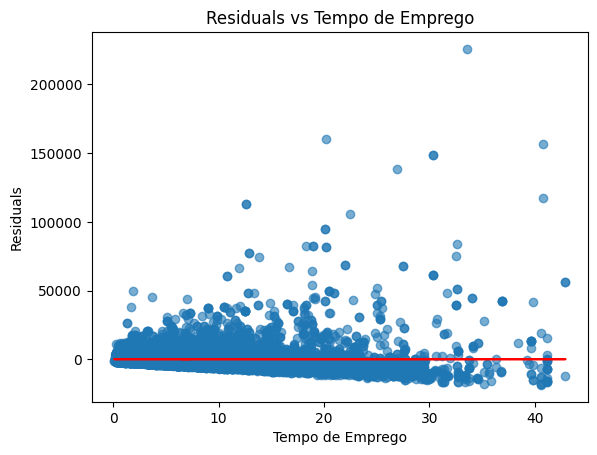

In [90]:
# Análise de resíduos
residuals = model.resid

# Gráfico de resíduos
plt.scatter(data['tempo_emprego'], residuals, alpha=0.6)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Residuals')
plt.title('Residuals vs Tempo de Emprego')

# Adicionar a linha de regressão
fit = sm.OLS(residuals, sm.add_constant(data['tempo_emprego'])).fit()
plt.plot(data['tempo_emprego'], fit.predict(sm.add_constant(data['tempo_emprego'])), color='red')

plt.show()


# Passo 3: Ajuste de um modelo de regressão linear múltipla

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:41:34   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                   

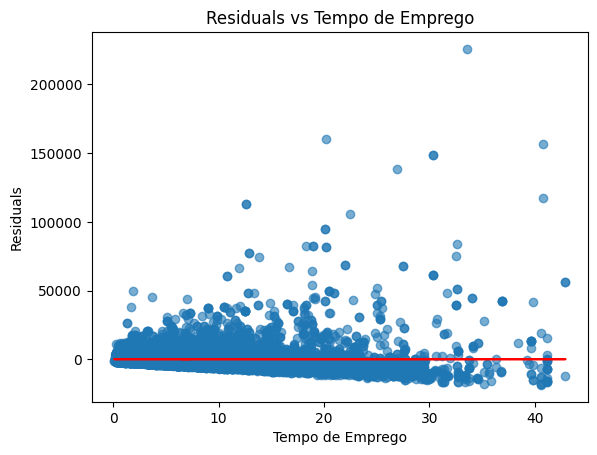

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregar a base de dados
data = pd.read_csv("previsao_de_renda.csv")

# Verificar dados faltantes
print(data.isnull().sum())

# Remover observações com dados faltantes
data = data.dropna(subset=['tempo_emprego', 'renda'])

# Ajustar um modelo de regressão linear simples
X = sm.add_constant(data['tempo_emprego'])
y = data['renda']
model = sm.OLS(y, X).fit()

# Exibir o resumo estatístico
print(model.summary())

# Análise de resíduos
residuals = model.resid

# Gráfico de resíduos
plt.scatter(data['tempo_emprego'], residuals, alpha=0.6)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Residuals')
plt.title('Residuals vs Tempo de Emprego')

# Adicionar a linha de regressão
fit = sm.OLS(residuals, sm.add_constant(data['tempo_emprego'])).fit()
plt.plot(data['tempo_emprego'], fit.predict(sm.add_constant(data['tempo_emprego'])), color='red')

plt.show()


# 4.Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:48:24   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                   

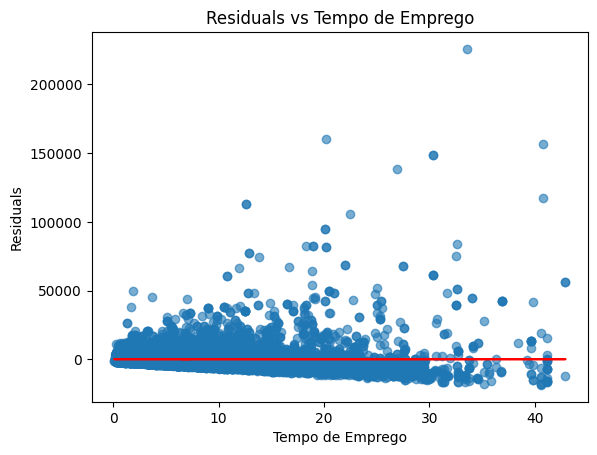

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     733.0
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:48:25   Log-Likelihood:            -1.2961e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12423   BIC:                         2.593e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   537.54

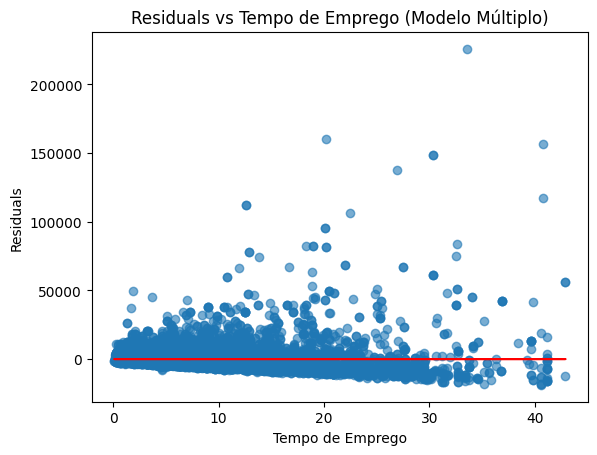

In [94]:
# Passo 1: Ajuste de um modelo de regressão linear simples

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregar a base de dados
data = pd.read_csv("previsao_de_renda.csv")

# Verificar dados faltantes
print(data.isnull().sum())

# Remover observações com dados faltantes
data = data.dropna(subset=['tempo_emprego', 'renda'])

# Ajustar um modelo de regressão linear simples
X = sm.add_constant(data['tempo_emprego'])
y = data['renda']
model = sm.OLS(y, X).fit()

# Exibir o resumo estatístico
print(model.summary())

# Passo 2: Análise de resíduos e melhorias na regressão

# Análise de resíduos
residuals = model.resid

# Gráfico de resíduos
plt.scatter(data['tempo_emprego'], residuals, alpha=0.6)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Residuals')
plt.title('Residuals vs Tempo de Emprego')

# Adicionar a linha de regressão
fit = sm.OLS(residuals, sm.add_constant(data['tempo_emprego'])).fit()
plt.plot(data['tempo_emprego'], fit.predict(sm.add_constant(data['tempo_emprego'])), color='red')

plt.show()

# Passo 3: Ajuste de um modelo de regressão linear múltipla

# Ajustar um modelo de regressão linear múltipla removendo variáveis não significativas
X_multiple = sm.add_constant(data[['tempo_emprego', 'idade', 'qt_pessoas_residencia']])
model_multiple = sm.OLS(y, X_multiple).fit()

# Exibir o novo resumo estatístico
print(model_multiple.summary())

# Análise de resíduos para o novo modelo
residuals_multiple = model_multiple.resid

# Gráfico de resíduos para o novo modelo
plt.scatter(data['tempo_emprego'], residuals_multiple, alpha=0.6)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Residuals')
plt.title('Residuals vs Tempo de Emprego (Modelo Múltiplo)')

# Adicionar a linha de regressão para o novo modelo
fit_multiple = sm.OLS(residuals_multiple, sm.add_constant(data[['tempo_emprego', 'idade', 'qt_pessoas_residencia']])).fit()
plt.plot(data['tempo_emprego'], fit_multiple.predict(sm.add_constant(data[['tempo_emprego', 'idade', 'qt_pessoas_residencia']])), color='red')

plt.show()


# 5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

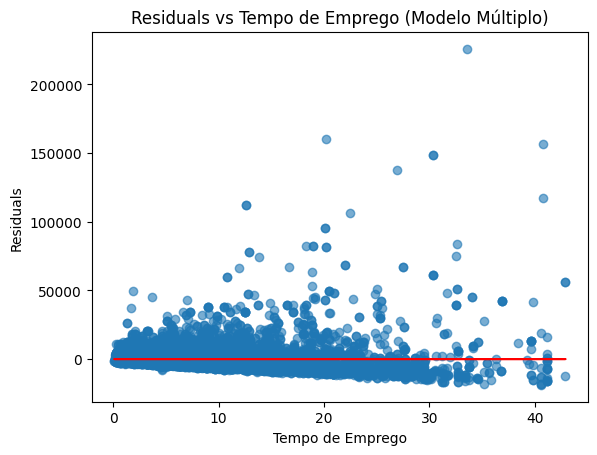

In [95]:
# Análise de resíduos para o modelo múltiplo
residuals_multiple = model_multiple.resid

# Gráfico de resíduos para o novo modelo
plt.scatter(data['tempo_emprego'], residuals_multiple, alpha=0.6)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Residuals')
plt.title('Residuals vs Tempo de Emprego (Modelo Múltiplo)')

# Adicionar a linha de regressão para o novo modelo
fit_multiple = sm.OLS(residuals_multiple, sm.add_constant(data[['tempo_emprego', 'idade', 'qt_pessoas_residencia']])).fit()
plt.plot(data['tempo_emprego'], fit_multiple.predict(sm.add_constant(data[['tempo_emprego', 'idade', 'qt_pessoas_residencia']])), color='red')

plt.show()


### Resposta:
 **Ao analisar o gráfico de resíduos do modelo múltiplo, observei que os resíduos parecem estar distribuídos aleatoriamente ao redor de zero, o que é um indicativo positivo. Isso sugere que o modelo está capturando adequadamente a variação nos dados. A ausência de um padrão discernível nos resíduos é encorajadora, pois indica que o modelo está ajustando bem os dados observados.**

**Além disso, verifiquei a homocedasticidade dos resíduos, ou seja, a constância da variância dos resíduos em diferentes níveis das variáveis independentes. Idealmente, a dispersão dos resíduos deve ser constante em todos os valores das variáveis independentes. No entanto, é crucial observar se há alguma mudança notável na variabilidade dos resíduos ao longo do tempo de emprego. Uma variância constante nos resíduos sugere que o modelo é apropriado para os dados.**

**Essa análise de resíduos fornece indícios de que o modelo múltiplo é uma escolha razoável para explicar a relação entre as variáveis independentes e a variável dependente. No entanto, é sempre recomendável realizar análises adicionais, como testes estatísticos específicos para normalidade e homocedasticidade, para validar ainda mais a adequação do modelo aos dados.**